In [18]:
#To install the necessary packages used for this Python data science project, enter the below command in your terminal:
#pip install tensorflow keras sklearn matplotlib pandas pil

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [19]:
data = []
labels = []
classes = 43
cur_path = '\\TrafficSigns'
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [20]:
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [21]:
#BUILDING THE MODEL

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
#Training the model

epochs = 15
history = model.fit(X_train, y_train, batch_size = 64, epochs= epochs, validation_data=(X_test, y_test))


Epoch 1/15
491/491 [==============================] - 71s 143ms/step - loss: 2.1770 - accuracy: 0.4554 - val_loss: 0.5496 - val_accuracy: 0.8679
Epoch 2/15
491/491 [==============================] - 72s 148ms/step - loss: 0.7758 - accuracy: 0.7733 - val_loss: 0.2674 - val_accuracy: 0.9267
Epoch 3/15
491/491 [==============================] - 76s 154ms/step - loss: 0.5165 - accuracy: 0.8444 - val_loss: 0.1489 - val_accuracy: 0.9617
Epoch 4/15
491/491 [==============================] - 67s 137ms/step - loss: 0.4158 - accuracy: 0.8752 - val_loss: 0.1590 - val_accuracy: 0.9600
Epoch 5/15
491/491 [==============================] - 67s 136ms/step - loss: 0.3388 - accuracy: 0.8991 - val_loss: 0.1047 - val_accuracy: 0.9731
Epoch 6/15
491/491 [==============================] - 71s 144ms/step - loss: 0.2946 - accuracy: 0.9119 - val_loss: 0.0910 - val_accuracy: 0.9750
Epoch 7/15
491/491 [==============================] - 70s 143ms/step - loss: 0.2833 - accuracy: 0.9146 - val_loss: 0.0786 - val_ac

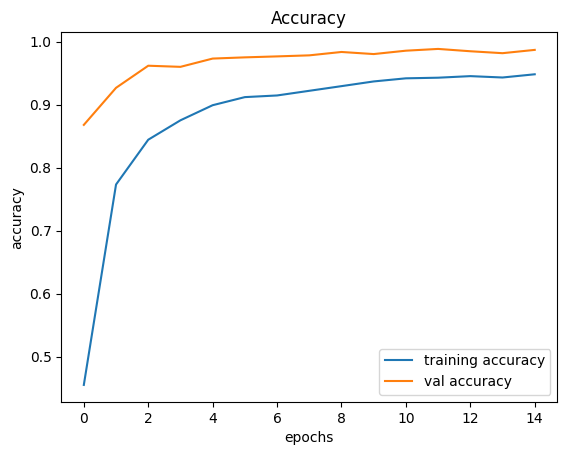

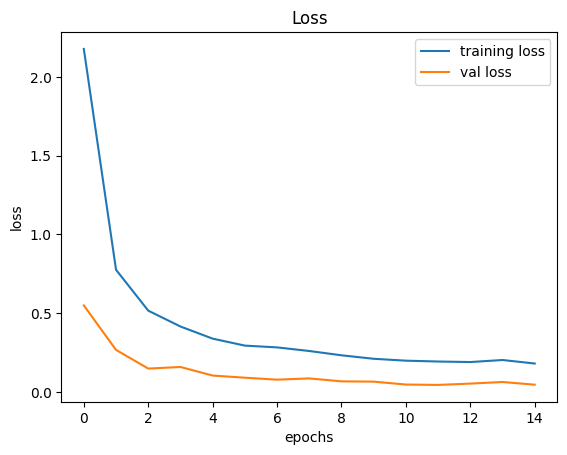

In [23]:
#Graph plotting for accuracy

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('\TrafficSigns\\Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
#pred = model.predict_classes(X_test)
predictions = np.argmax(model.predict(X_test),axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, predictions))


model.save('traffic_classifier.h5')


395/395 [==============================] - 8s 20ms/step
0.953840063341251
